# KOSPI200_2011_22 주 별 시계열 예측하기 (정규화 X)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import itertools
import math
from pylab import rcParams

In [2]:
# 그래프 사이즈 지정
rcParams['figure.figsize'] = 15,10

In [3]:
df = pd.read_csv('./final.csv')
df['Date'] = pd.to_datetime(df['Date'])  # datetime으로 변환

In [4]:
df_y = pd.DataFrame()

In [5]:
for i in range(len(df)) :
    if (i % 5 == 0) & (i != 0) :
        df_y = pd.concat([df_y, pd.DataFrame(df.iloc[i, :]).T])

In [6]:
df_y.set_index('Date', inplace=True)

In [7]:
x_list = []

In [8]:
for i in range(len(df)) :
    if (i % 5 == 0) & (i != 0) :
        x_list.append(df['Close'].values[i - 5:i])

In [9]:
X = np.array(x_list)

In [10]:
y_list = []

In [11]:
# 매 월 첫 날의 데이터들을 y_list에 넣어준다.
for i in range(len(df_y['Close'].tolist())) :
    y_list.append(np.array([df_y['Close'].tolist()[i]]))

In [12]:
y = np.array(y_list)

## LSTM

In [13]:
from sklearn.model_selection import train_test_split
from keras import models, layers, callbacks

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [34]:
x = layers.Input(shape=(X_train.shape[1], 1))
lstm = layers.LSTM(64)(x)
dense = layers.Dense(32)(lstm)
norm = layers.BatchNormalization()(dense)
relu = layers.ReLU()(norm)
y = layers.Dense(1)(relu)
model = models.Model(x, y)

model.compile('adam', 'mean_squared_error')  # loss function: mean_squared_error 사용

In [35]:
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=70)

In [36]:
# 모델 학습
history = model.fit(X_train, y_train, epochs = 200, validation_data = [X_test, y_test], batch_size = 16, verbose = 1)

Epoch 1/200
28/28 [==============================] - 4s 32ms/step - loss: 84439.5703 - val_loss: 84174.1953
Epoch 2/200
28/28 [==============================] - 0s 7ms/step - loss: 83739.7500 - val_loss: 84008.2266
Epoch 3/200
28/28 [==============================] - 0s 7ms/step - loss: 83140.6797 - val_loss: 83506.1016
Epoch 4/200
28/28 [==============================] - 0s 8ms/step - loss: 82736.5000 - val_loss: 83234.8281
Epoch 5/200
28/28 [==============================] - 0s 9ms/step - loss: 82303.6406 - val_loss: 82454.6250
Epoch 6/200
28/28 [==============================] - 0s 7ms/step - loss: 81872.4062 - val_loss: 81343.4688
Epoch 7/200
28/28 [==============================] - 0s 8ms/step - loss: 81300.5781 - val_loss: 81080.5781
Epoch 8/200
28/28 [==============================] - 0s 8ms/step - loss: 80799.1641 - val_loss: 80416.7734
Epoch 9/200
28/28 [==============================] - 0s 7ms/step - loss: 80177.6641 - val_loss: 77763.8750
Epoch 10/200
28/28 [================

28/28 [==============================] - 0s 8ms/step - loss: 4190.9741 - val_loss: 2754.6646
Epoch 78/200
28/28 [==============================] - 0s 7ms/step - loss: 4093.1812 - val_loss: 2331.5039
Epoch 79/200
28/28 [==============================] - 0s 7ms/step - loss: 3929.8752 - val_loss: 438.8492
Epoch 80/200
28/28 [==============================] - 0s 8ms/step - loss: 3531.0022 - val_loss: 3137.5269
Epoch 81/200
28/28 [==============================] - 0s 8ms/step - loss: 3218.1379 - val_loss: 1373.8928
Epoch 82/200
28/28 [==============================] - 0s 7ms/step - loss: 3092.7095 - val_loss: 738.1009
Epoch 83/200
28/28 [==============================] - 0s 7ms/step - loss: 2595.7158 - val_loss: 2091.1392
Epoch 84/200
28/28 [==============================] - 0s 7ms/step - loss: 2703.6348 - val_loss: 1683.8308
Epoch 85/200
28/28 [==============================] - 0s 8ms/step - loss: 2248.7085 - val_loss: 1742.1885
Epoch 86/200
28/28 [==============================] - 0s 7ms/

Epoch 155/200
28/28 [==============================] - 0s 9ms/step - loss: 602.3361 - val_loss: 243.7164
Epoch 156/200
28/28 [==============================] - 0s 9ms/step - loss: 555.1147 - val_loss: 572.6584
Epoch 157/200
28/28 [==============================] - 0s 8ms/step - loss: 430.7468 - val_loss: 512.7115
Epoch 158/200
28/28 [==============================] - 0s 8ms/step - loss: 463.3617 - val_loss: 268.1866
Epoch 159/200
28/28 [==============================] - 0s 7ms/step - loss: 545.2736 - val_loss: 447.1586
Epoch 160/200
28/28 [==============================] - 0s 9ms/step - loss: 485.6625 - val_loss: 424.0133
Epoch 161/200
28/28 [==============================] - 0s 8ms/step - loss: 680.8555 - val_loss: 827.2982
Epoch 162/200
28/28 [==============================] - 0s 7ms/step - loss: 604.7115 - val_loss: 815.1677
Epoch 163/200
28/28 [==============================] - 0s 8ms/step - loss: 592.7807 - val_loss: 1032.0713
Epoch 164/200
28/28 [==============================] -

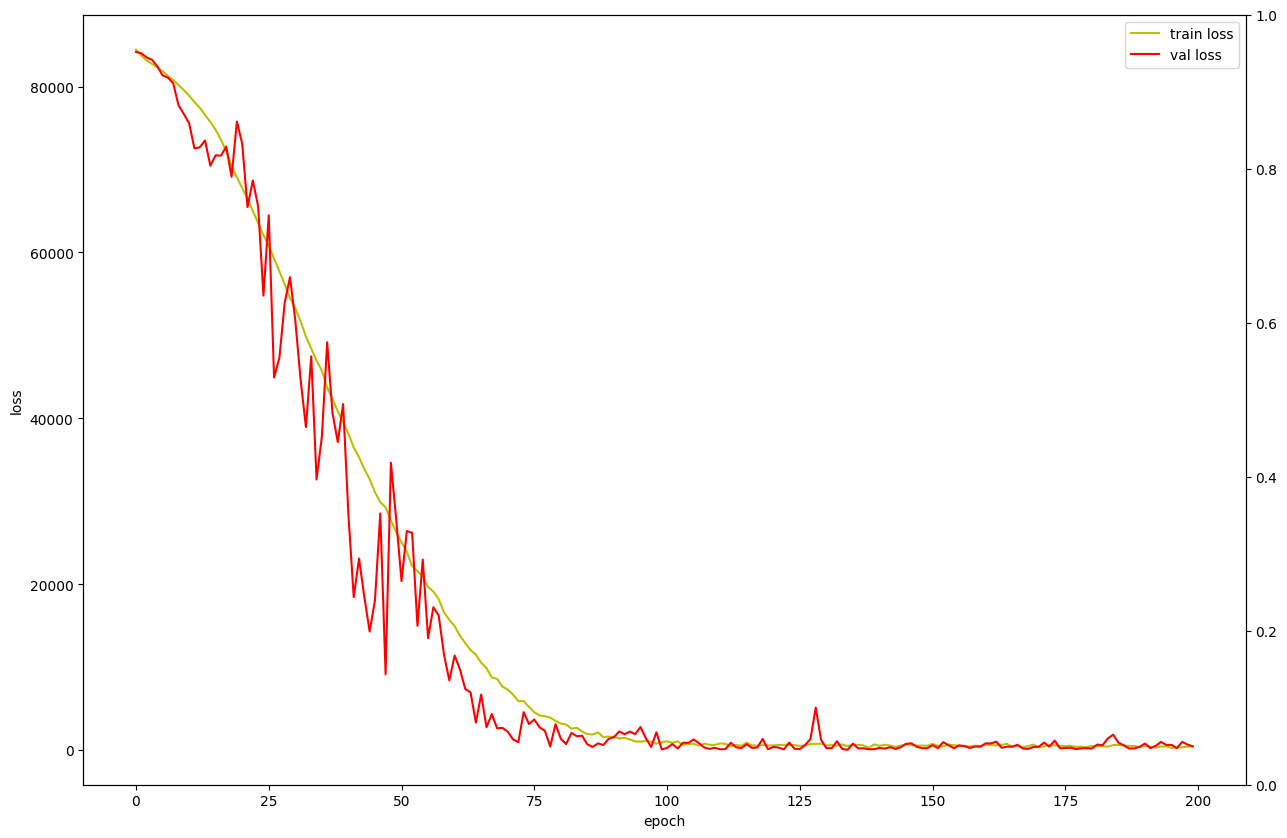

In [37]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.legend()
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

plt.show()

In [38]:
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
y_train_predict = model.predict(X_train)

14/14 [==============================] - 1s 3ms/step


In [40]:
print(r2_score(y_train, y_train_predict))

0.8182396238349372


In [41]:
y_test_predict = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [42]:
print(r2_score(y_test, y_test_predict))

0.8212964861304628


## 예측

In [43]:
# 2023년 1월의 마지막 5일 종가 데이터
test_list = [320.76, 325.57, 327.98, 322.67, 317.26]

In [44]:
test_array = np.array(test_list)

In [45]:
# 2023년 2월 1일의 종가 예측
print(model.predict(test_array.reshape(1, test_array.shape[0], 1)))

1/1 [==============================] - 1s 633ms/step
[[339.9251]]


실제값: 321.19	

## 실제값과 예측값 시각화

In [46]:
visual_predict = model.predict(X.reshape(591, 5, 1))

19/19 [==============================] - 0s 3ms/step


In [47]:
visual_t = df_y.reset_index()

In [48]:
visual_y = pd.concat([visual_t['Date'], pd.DataFrame(visual_predict)], axis = 1)
visual_y.rename({0 : 'Close'}, axis = 'columns', inplace = True)
visual_y

,Date,Close
0,2011-01-10,292.739197
1,2011-01-17,295.385742
2,2011-01-24,289.630798
3,2011-01-31,295.538391
4,2011-02-10,287.349823
...,...,...
586,2022-11-30,338.549194
587,2022-12-07,333.823914
588,2022-12-14,333.612488
589,2022-12-21,329.184906


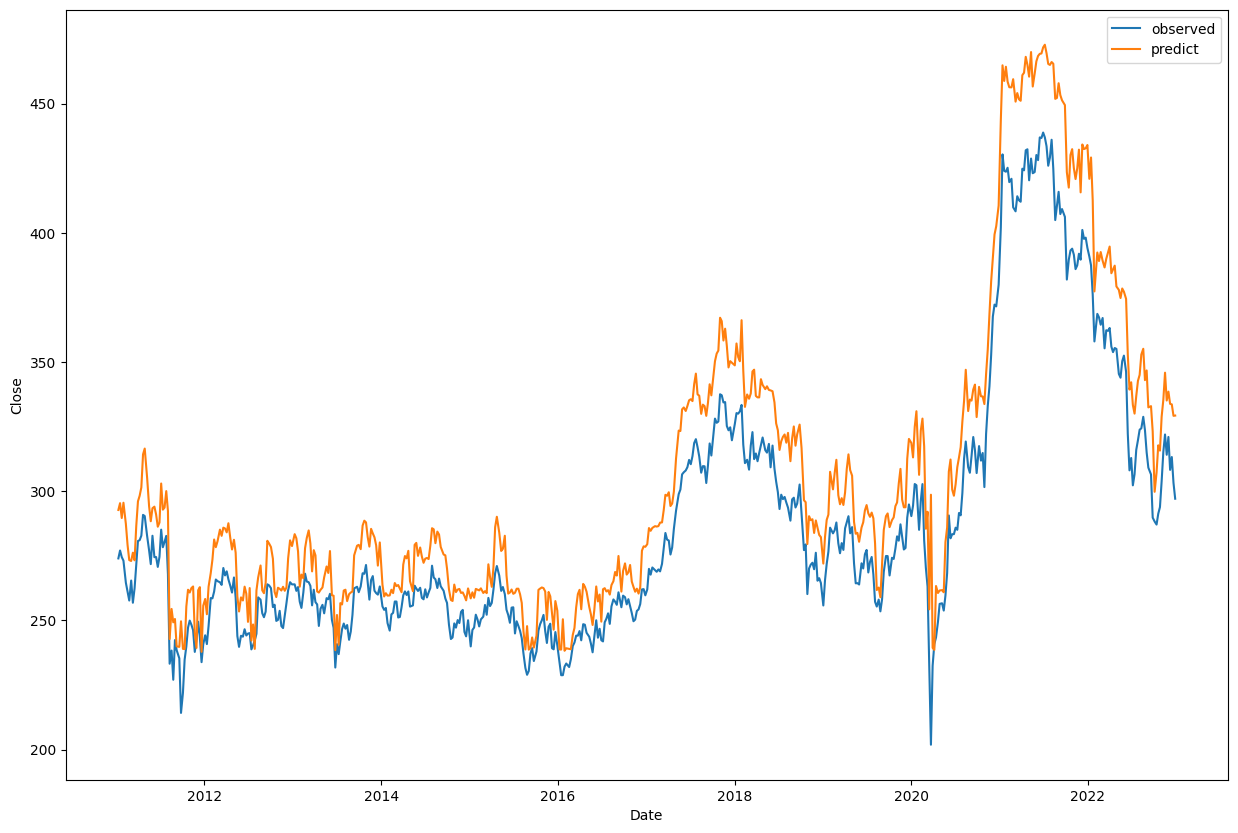

In [49]:
sns.lineplot(visual_t, x = 'Date', y = 'Close', label='observed')
sns.lineplot(visual_y, x = 'Date', y = 'Close', label='predict')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()